In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydata=pd.read_csv('./multiple-linear-regression-dataset.csv',sep=',')

In [3]:
mydata

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28
5,4.0,6900,23
6,15.0,20000,35
7,7.0,8500,29
8,3.0,6000,22
9,2.0,3500,23


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()

mydata = min_max_scaler.fit_transform(mydata)

mydata_normalized = pd.DataFrame(mydata, columns=['deneyim','maas','yas'])
mydata_normalized

,deneyim,maas,yas
0,0.033333,0.014085,0.071429
1,0.000000,0.000000,0.000000
2,0.066667,0.028169,0.142857
3,0.333333,0.323944,0.285714
4,0.533333,0.380282,0.500000
5,0.266667,0.261972,0.142857
6,1.000000,1.000000,1.000000
7,0.466667,0.352113,0.571429
8,0.200000,0.211268,0.071429
9,0.133333,0.070423,0.142857


In [5]:
#hamishe bara joda kardane bishtar az 1 sotun az panda data frame 2 acolad mikhaim. va hamintor chon feature ha hastan
X=mydata_normalized[['deneyim','maas']]
X

,deneyim,maas
0,0.033333,0.014085
1,0.000000,0.000000
2,0.066667,0.028169
3,0.333333,0.323944
4,0.533333,0.380282
5,0.266667,0.261972
6,1.000000,1.000000
7,0.466667,0.352113
8,0.200000,0.211268
9,0.133333,0.070423


In [6]:
#bara target hamshie 1 acolad
y=mydata_normalized['yas']
y

0     0.071429
1     0.000000
2     0.142857
3     0.285714
4     0.500000
5     0.142857
6     1.000000
7     0.571429
8     0.071429
9     0.142857
10    0.785714
11    0.642857
12    0.928571
13    0.428571
Name: yas, dtype: float64

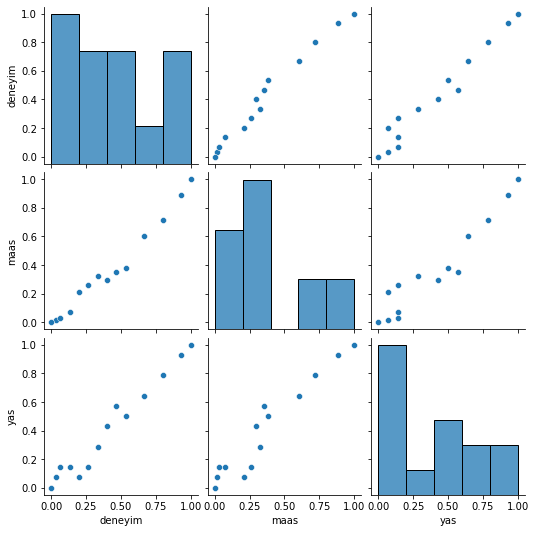

In [7]:
sns.pairplot(mydata_normalized)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
regression_model= LinearRegression()

In [46]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [47]:
prediction=regression_model.predict(X_test)
prediction

array([0.13002265, 0.66002271, 0.00388472])

In [48]:
print(regression_model.intercept_)

-0.04101595952965781


In [49]:
theta=regression_model.coef_
theta

array([ 1.60394444, -0.60805328])

In [50]:
#calculate the mean squared erorr
model_mse= mean_squared_error(y_test, prediction)

#calculate the mean absolute erorr
model_mae= mean_absolute_error(y_test,prediction)

#calculate the mean squared erorr
model_rmse= math.sqrt(model_mse)

print('MSE {:.3}'.format(model_mse))
print('MAE {:.3}'.format(model_mae))
print('RMSE {:.3}'.format(model_rmse))

MSE 0.00167
MAE 0.0325
RMSE 0.0409


In [51]:
model_r2=r2_score(y_test,prediction)
model_r2

0.9740993614222251

In [52]:
metrics.explained_variance_score(y_test,prediction)

0.9809694277143884

### $h(\theta)= \theta_0 + \theta_1 X_1 + \theta_2 X_2$

In [53]:
theta0=(regression_model.intercept_)*np.ones(y.shape)
theta0.shape

(14,)

In [54]:
theta.shape

(2,)

In [55]:
X.shape

(14, 2)

In [56]:
y.shape

(14,)

In [57]:
htheta=np.dot(X,theta)+theta0
htheta.shape

(14,)

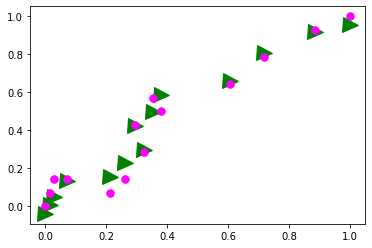

In [58]:
plt.plot(X['maas'], htheta,">", c="green",markersize=15)
plt.plot(X['maas'], y,".", c="magenta",markersize=15)

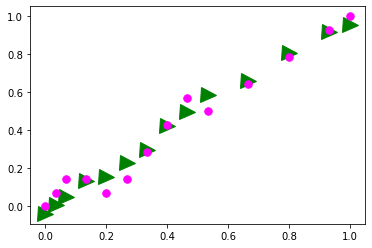

In [59]:
plt.plot(X['deneyim'], htheta,">", c="green",markersize=15)
plt.plot(X['deneyim'], y,".", c="magenta",markersize=15)